# 20 类新闻文档分类

只加载了训练数据集

In [1]:
from sklearn.datasets import load_files

news_train = load_files('./datasets/mlcomp/379/train/')

In [7]:
X = news_train.data
y = news_train.target

In [10]:
print(len(news_train.target_names))

20


In [13]:
len(X)

13180

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(encoding='latin-1')

X_train = vectorizer.fit_transform(X)

In [23]:
X_train.shape

(13180, 130274)

In [26]:
X_train[0].getnnz()

108

In [27]:
from sklearn.naive_bayes import MultinomialNB

mnb_clf = MultinomialNB(alpha=0.0001)
mnb_clf.fit(X_train, y)

MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)

In [28]:
mnb_clf.score(X_train, y)

0.9978755690440061

In [29]:
new_test = load_files('./datasets/mlcomp/379/test/')

In [32]:
X_test = new_test.data
y = new_test.target

In [38]:
len(X_test),len(y)

(5648, 5648)

In [39]:
X_tfidf_test = vectorizer.transform(X_test)

In [41]:
y_test_predict = mnb_clf.predict(X_tfidf_test)

In [40]:
mnb_clf.score(X_tfidf_test, y)

0.9088172804532578

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y, y_test_predict, target_names=news_train.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.90      0.91      0.91       245
           comp.graphics       0.80      0.90      0.85       298
 comp.os.ms-windows.misc       0.82      0.79      0.80       292
comp.sys.ibm.pc.hardware       0.81      0.80      0.81       301
   comp.sys.mac.hardware       0.90      0.91      0.91       256
          comp.windows.x       0.88      0.88      0.88       297
            misc.forsale       0.87      0.81      0.84       290
               rec.autos       0.92      0.93      0.92       324
         rec.motorcycles       0.96      0.96      0.96       294
      rec.sport.baseball       0.97      0.94      0.96       315
        rec.sport.hockey       0.96      0.99      0.98       302
               sci.crypt       0.95      0.96      0.95       297
         sci.electronics       0.91      0.85      0.88       313
                 sci.med       0.96      0.96      0.96       277
         

看看多分类问题的混淆矩阵

In [73]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_test_predict)
print(cm)

[[224   0   0   0   0   0   0   0   0   0   0   0   0   0   2   5   0   0
    1  13]
 [  1 267   5   5   2   8   1   1   0   0   0   2   3   2   1   0   0   0
    0   0]
 [  1  13 230  24   4  10   5   0   0   0   0   1   2   1   0   0   0   0
    1   0]
 [  0   9  21 242   7   2  10   1   0   0   1   1   7   0   0   0   0   0
    0   0]
 [  0   1   5   5 233   2   2   2   1   0   0   3   1   0   1   0   0   0
    0   0]
 [  0  20   6   3   1 260   0   0   0   2   0   1   0   0   2   0   2   0
    0   0]
 [  0   2   5  12   3   1 235  10   2   3   1   0   7   0   2   0   2   1
    4   0]
 [  0   1   0   0   1   0   8 300   4   1   0   0   1   2   3   0   2   0
    1   0]
 [  0   1   0   0   0   2   2   3 283   0   0   0   1   0   0   0   0   0
    1   1]
 [  0   1   1   0   1   2   1   2   0 297   8   1   0   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   2   2 298   0   0   0   0   0   0   0
    0   0]
 [  0   1   2   0   0   1   1   0   0   0   0 284   2   1   0   0

# 混淆矩阵可视化

In [62]:
np.fill_diagonal(cm,0)

In [69]:
error_matrix = cm/cm.sum(axis=1)

In [71]:
error_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.22222222,
        0.38461538, 0.        , 0.        , 0.04166667, 0.35135135],
       [0.04761905, 0.        , 0.08064516, 0.08474576, 0.08695652,
        0.21621622, 0.01818182, 0.04166667, 0.        , 0.        ,
        0.        , 0.15384615, 0.06382979, 0.18181818, 0.11111111,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.04761905, 0.41935484, 0.        , 0.40677966, 0.17391304,
        0.27027027, 0.09090909, 0.        , 0.        , 0.        ,
        0.        , 0.07692308, 0.04255319, 0.09090909, 0.        ,
        0.        , 0.        , 0.        , 0.04166667, 0.        ],
       [0.        , 0.29032258, 0.33870968, 0.        , 0.30434783,
        0.05405405, 0.18181818, 0.04166667, 0.        , 0.        ,
        0.25      , 0.07692308, 0.14893617, 0

In [65]:
cm.sum(axis=1)

array([21, 31, 62, 59, 23, 37, 55, 24, 11, 18,  4, 13, 47, 11,  9, 13, 10,
        6, 24, 37])

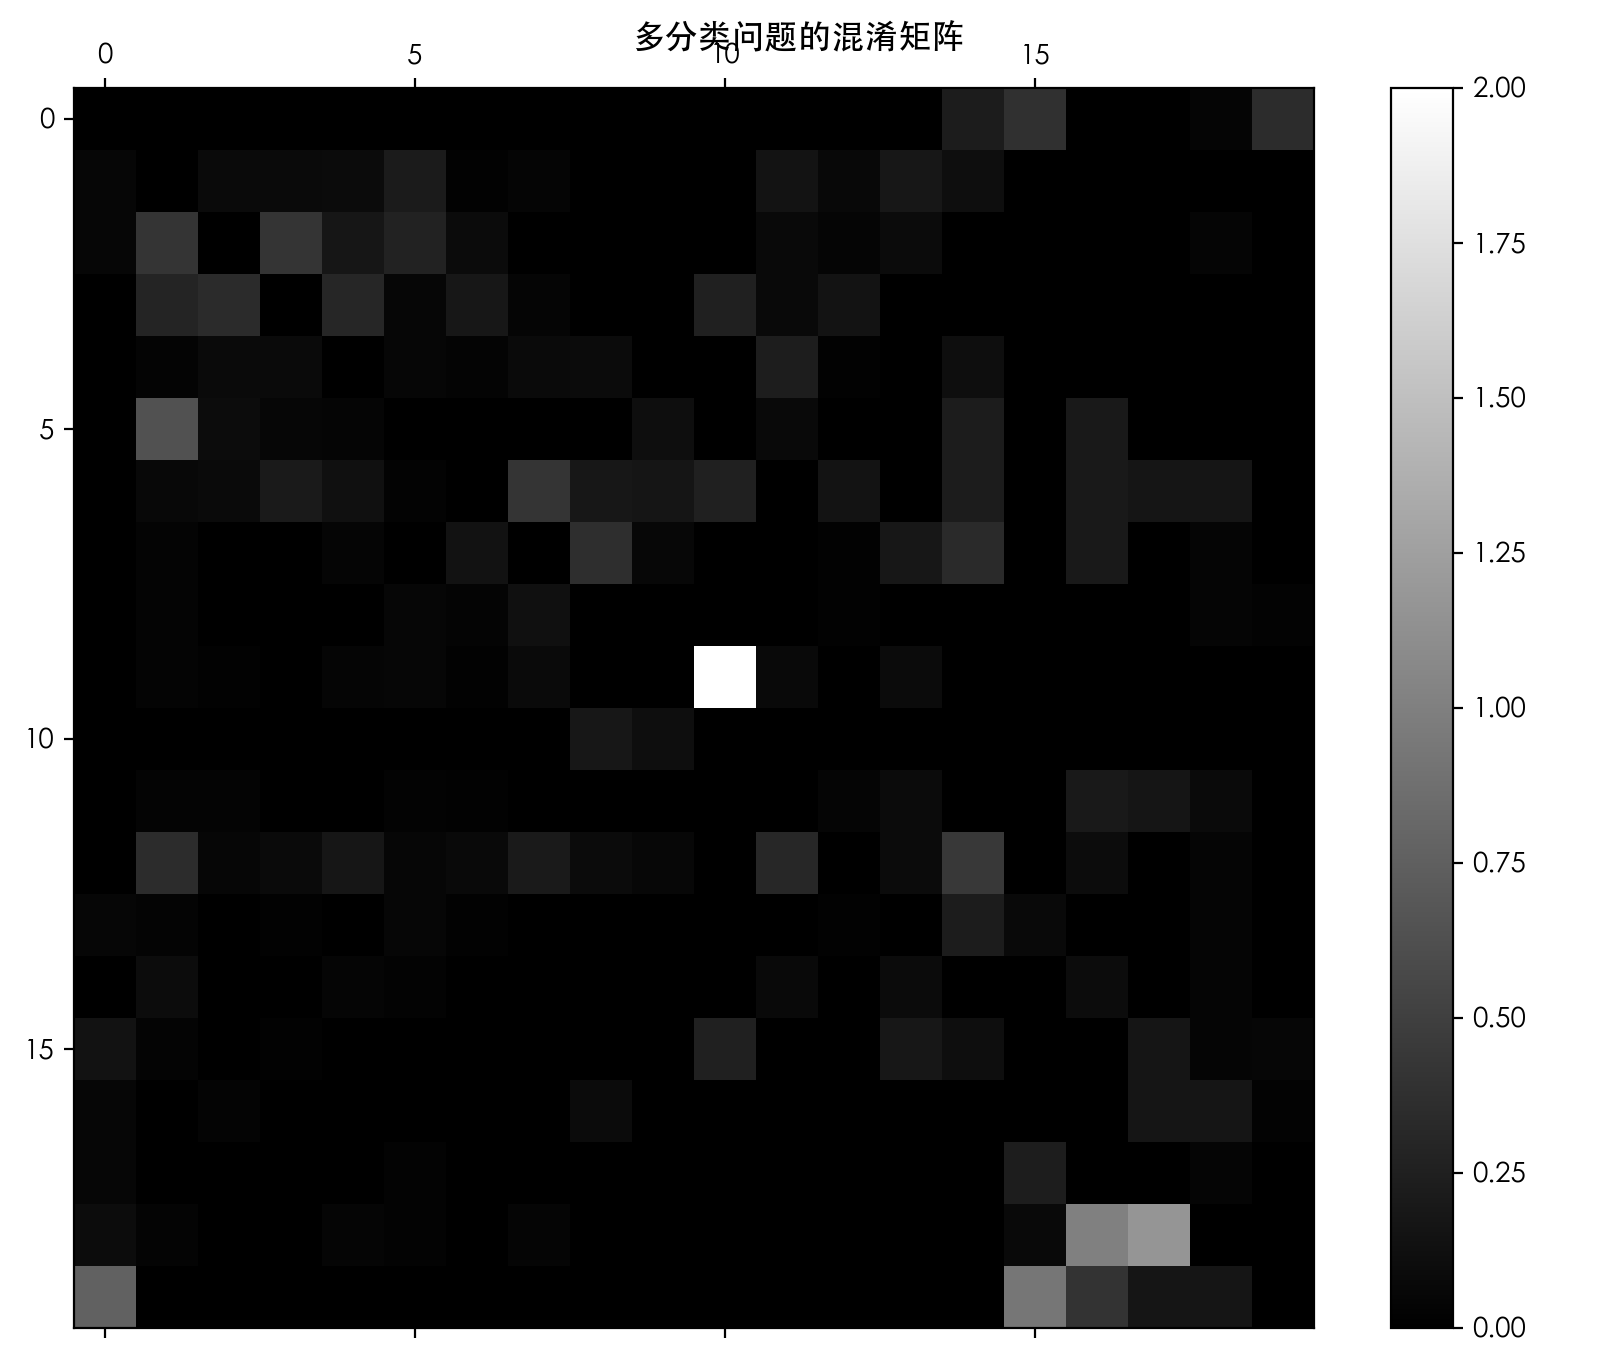

In [70]:
plt.figure(figsize=(10, 8), dpi=100)
plt.title('多分类问题的混淆矩阵')



ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.matshow(error_matrix, fignum=1, cmap='gray')
plt.colorbar()
plt.show()